# CSE 5526 PA1 Utkarsh Pratap Singh Jadon

## Question 1

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Create a sigmoid activation function

In [2]:
def activationFunction(z):
    return 1/(1 + np.exp(-z))

### Create a function to train a model without momentum

In [3]:
def train(eta):
    
    # Defining input and desired output bits
    np.random.seed(96)
    inputBits = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
    y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]])
    
    # Initializing weights and bias for hidden layer
    wh = np.random.uniform(-1,1,(4,4))
    bh = np.random.uniform(-1,1,(4,1))
    
    # Initializing weights and bias for output layer
    wo = np.random.uniform(-1,1,(1,4))
    bo = np.random.uniform(-1,1,(1,1))
    
    # Initializaing gradients
    dj_dwh = np.array((4,4))
    dj_dbh = np.array((4,1))
    dj_dwo = np.array((1,4))
    dj_dbo = np.array((1,1))
    
    meanSquaredError = []
    absoluteError = []
    epoch = 0
    print("Eta = ", eta)
    
    while True:
        difference = []
        squaredError = []
        for i in range(inputBits.shape[0]):
            x = np.reshape(inputBits[i,],(4,1))
            d = y[i]
            
            # Forward Propogation
            zh = wh.dot(x) + bh
            ah = activationFunction(zh)
            zo = wo.dot(ah) + bo
            ao = activationFunction(zo)
            
            error1 = d - ao
            error2 = (1/2)*(error1**2)
            
            # Partial derivative of cost with respect to output and hidden layer activation potential
            dj_dzo = -(error1)*(ao)*(1 - ao)
            dj_dzh = (wo.T)*(dj_dzo)*(ah)*(1 - ah)
            
            # Partial derivative of cost with respect to output layer weights and biases
            dj_dwo = dj_dzo.dot(ah.T)
            dj_dbo = dj_dzo
            
            # Partial derivative of cost with respect to hidden layer weights and biases
            dj_dwh = dj_dzh.dot(x.T)
            dj_dbh = dj_dzh
            
            # Applying gradient descent to output layer weights and biases
            wo = wo - ((eta)*(dj_dwo))
            bo = bo - ((eta)*(dj_dbo))
            
            # Applying gradient descent to hidden layer weights and biases
            wh = wh - ((eta)*(dj_dwh))
            bh = bh - ((eta)*(dj_dbh))
            
            # Storing difference and squared error values for each input pattern
            difference.append(error1[0,0])
            squaredError.append(error2[0,0])
            
        epoch += 1
        
        # Storing mean difference (absolute) and mean squared error values for each epoch
        absoluteError.append(sum(np.abs(difference)/16))
        meanSquaredError.append(sum(squaredError)/16)
        
        # Check if absolute error (difference) for each input bit pattern is less than 0.05 or not
        maxError = np.max(np.abs(difference))
        if maxError<=0.05:
            break
            
    print("Number of Epochs: ", epoch)
    print("Error: ", maxError, '\n')
    
    return epoch, meanSquaredError, absoluteError
    

### Define the learning rates and call the train function

In [4]:
etas = np.arange(0.05,0.55,0.05)
epochs = []
mseError = []
absError = []

for n in etas:
    (a, b, c) = train(n)
    epochs.append(a)
    mseError.append(b)
    absError.append(c)

Eta =  0.05
Number of Epochs:  2001559
Error:  0.049999942424458266 

Eta =  0.1
Number of Epochs:  923368
Error:  0.04999979187945003 

Eta =  0.15000000000000002
Number of Epochs:  878509
Error:  0.04999962862334095 

Eta =  0.2
Number of Epochs:  868440
Error:  0.049999727294656404 

Eta =  0.25
Number of Epochs:  776998
Error:  0.049999715456975236 

Eta =  0.3
Number of Epochs:  11616
Error:  0.04999598205870437 

Eta =  0.35000000000000003
Number of Epochs:  238892
Error:  0.04999899369186473 

Eta =  0.4
Number of Epochs:  48651
Error:  0.04999528534963253 

Eta =  0.45
Number of Epochs:  66910
Error:  0.04999713513352861 

Eta =  0.5
Number of Epochs:  67156
Error:  0.04999911875869641 



### Plot graphs

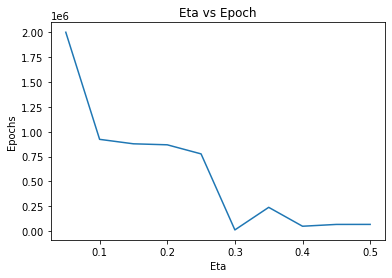

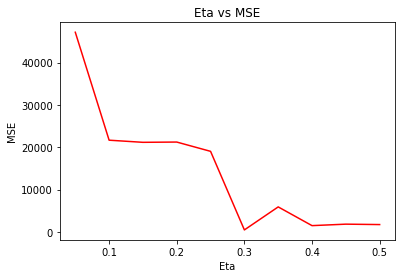

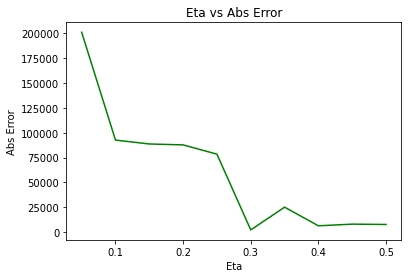

In [5]:
# Plot 1: Eta vs Epochs
plt.figure(1)
plt.plot(etas,epochs)
plt.title('Eta vs Epoch')
plt.xlabel('Eta')
plt.ylabel('Epochs')

# Plot 2: Eta vs Mean Squared Error
plt.figure(2)
sumMseError = [sum(item) for item in mseError]
plt.plot(etas,sumMseError,'r-')
plt.title('Eta vs MSE')
plt.xlabel('Eta')
plt.ylabel('MSE')

# Plot 3: Eta vs Absolute Error
plt.figure(3)
sumAbsError = [sum(item) for item in absError]
plt.plot(etas,sumAbsError,'g-')
plt.title('Eta vs Abs Error')
plt.xlabel('Eta')
plt.ylabel('Abs Error')

plt.show()

### Create a function to train a model with momentum

In [3]:
def trainWithMomentum(eta):
    
    # Defining input and desired output bits
    np.random.seed(96)
    inputBits = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
    y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]])
    
    # Initializing weights and bias for hidden layer
    wh = np.random.uniform(-1,1,(4,4))
    bh = np.random.uniform(-1,1,(4,1))
    
    # Initializing weights and bias for output layer
    wo = np.random.uniform(-1,1,(1,4))
    bo = np.random.uniform(-1,1,(1,1))
    
    # Initializaing gradients
    dj_dwh = np.array((4,4))
    dj_dbh = np.array((4,1))
    dj_dwo = np.array((1,4))
    dj_dbo = np.array((1,1))
    
    # Initializing momentum
    dj_dwh_previous = 0
    dj_dbh_previous = 0
    dj_dwo_previous = 0
    dj_dbo_previous = 0
    
    meanSquaredError = []
    absoluteError = []
    epoch = 0
    print("Eta = ", eta)
    
    while True:
        difference = []
        squaredError = []
        for i in range(inputBits.shape[0]):
            x = np.reshape(inputBits[i,],(4,1))
            d = y[i]
            
            # Forward Propogation
            zh = wh.dot(x) + bh
            ah = activationFunction(zh)
            zo = wo.dot(ah) + bo
            ao = activationFunction(zo)
            
            error1 = d - ao
            error2 = (1/2)*(error1**2)
            
            # Partial derivative of cost with respect to output and hidden layer activation potential
            dj_dzo = -(error1)*(ao)*(1 - ao)
            dj_dzh = (wo.T)*(dj_dzo)*(ah)*(1 - ah)
            
            # Partial derivative of cost with respect to output layer weights and biases
            dj_dwo = (eta * dj_dzo.dot(ah.T)) + (0.9 * dj_dwo_previous)
            dj_dbo = (eta * dj_dzo) + (0.9 * dj_dbo_previous)
            
            # Partial derivative of cost with respect to hidden layer weights and biases
            dj_dwh = (eta * dj_dzh.dot(x.T)) + (0.9 * dj_dwh_previous)
            dj_dbh = (eta * dj_dzh) + (0.9 * dj_dbh_previous)
            
            # Applying gradient descent to output layer weights and biases
            wo = wo - (dj_dwo)
            bo = bo - (dj_dbo)
            
            # Applying gradient descent to hidden layer weights and biases
            wh = wh - (dj_dwh)
            bh = bh - (dj_dbh)
            
            dj_dwh_previous = dj_dwh
            dj_dbh_previous = dj_dbh
            dj_dwo_previous = dj_dwo
            dj_dbo_previous = dj_dbo
            
            # Storing difference and squared error values for each input pattern
            difference.append(error1[0,0])
            squaredError.append(error2[0,0])
            
        epoch += 1
        
        # Storing mean difference (absolute) and mean squared error values for each epoch
        absoluteError.append(sum(np.abs(difference)/16))
        meanSquaredError.append(sum(squaredError)/16)
        
        # Check if absolute error (difference) for each input bit pattern is less than 0.05 or not
        maxError = np.max(np.abs(difference))
        if maxError<=0.05:
            break
            
    print("Number of Epochs: ", epoch)
    print("Error: ", maxError, '\n')
    
    return epoch, meanSquaredError, absoluteError
    

### Define the learning rates and call the trainWithMomentum function

In [4]:
etas = np.arange(0.05,0.55,0.05)
epochs = []
mseError = []
absError = []

for n in etas:
    (a, b, c) = trainWithMomentum(n)
    epochs.append(a)
    mseError.append(b)
    absError.append(c)

Eta =  0.05
Number of Epochs:  171064
Error:  0.04999882958124158 

Eta =  0.1
Number of Epochs:  88894
Error:  0.04999879282632913 

Eta =  0.15000000000000002
Number of Epochs:  91821
Error:  0.049996900641995135 

Eta =  0.2
Number of Epochs:  1866
Error:  0.04996549050880528 

Eta =  0.25
Number of Epochs:  41264
Error:  0.04999395777314381 

Eta =  0.3
Number of Epochs:  11907
Error:  0.049990326067604805 

Eta =  0.35000000000000003
Number of Epochs:  10291
Error:  0.049988518617884316 

Eta =  0.4
Number of Epochs:  1367630
Error:  0.04999117479646756 

Eta =  0.45
Number of Epochs:  3379
Error:  0.04996206404193897 

Eta =  0.5
Number of Epochs:  46831
Error:  0.04999264310238078 



### Plot graphs

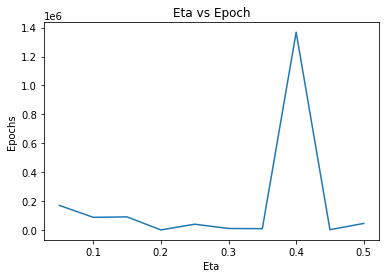

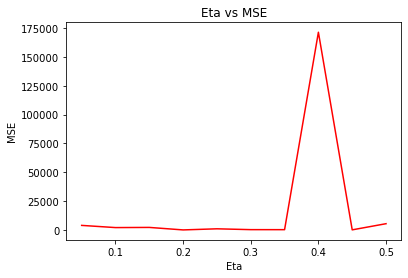

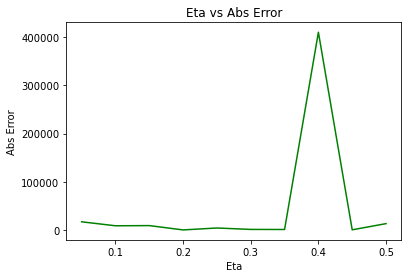

In [5]:
# Plot 1: Eta vs Epochs
plt.figure(1)
plt.plot(etas,epochs)
plt.title('Eta vs Epoch')
plt.xlabel('Eta')
plt.ylabel('Epochs')

# Plot 2: Eta vs Mean Squared Error
plt.figure(2)
sumMseError = [sum(item) for item in mseError]
plt.plot(etas,sumMseError,'r-')
plt.title('Eta vs MSE')
plt.xlabel('Eta')
plt.ylabel('MSE')

# Plot 3: Eta vs Absolute Error
plt.figure(3)
sumAbsError = [sum(item) for item in absError]
plt.plot(etas,sumAbsError,'g-')
plt.title('Eta vs Abs Error')
plt.xlabel('Eta')
plt.ylabel('Abs Error')

plt.show()